In [2]:
import os
import shutil
import pandas as pd
from pydicom import dcmread
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import json
from PIL import Image

import seaborn as sns
sns.set_theme()
sns.set_context("paper")

import sys

sys.path.append("./")

# from dataset import SeriesDataset

data_dir = "/export/gaon1/data/jteneggi/data/rsna-intracranial-hemorrhage-detection"
train_dir = os.path.join(data_dir, "stage_2_train")
# train_csv = os.path.join(data_dir, "stage_2_train.csv")
# pytorch_train_dir = os.path.join(data_dir, "train")
# pytorch_test_dir = os.path.join(data_dir, "test")

# train_dataset = SeriesDataset(data_dir=data_dir, op="train")

In [6]:
with open(os.path.join(data_dir, "raw_series.json"), "r", encoding="utf-8") as f:
    sorted_series = json.load(f)
series_ids = list(sorted_series.keys())

print(f"Found {len(sorted_series)} unique series.")

Found 21744 unique series.


In [7]:
print(sorted_series[series_ids[0]])

{'series': [['76d55d9d0', '0'], ['96d282ea9', '0'], ['7d8a7c29d', '0'], ['4d4401491', '0'], ['8f5ded0b7', '0'], ['213346b48', '0'], ['e07862283', '0'], ['c29529650', '0'], ['1bc422f0c', '0'], ['73bf91129', '0'], ['55a7874f6', '0'], ['2c2a37426', '0'], ['e0276df9e', '0'], ['1a5bac972', '0'], ['d2e7247f5', '0'], ['79273c19d', '0'], ['2d0e5725a', '0'], ['67591eae2', '0'], ['fee5c2786', '0'], ['12bf83ff1', '0'], ['bbdc941dd', '0'], ['483e6a157', '0'], ['424b93897', '0'], ['d292f6cab', '0'], ['53553ad15', '0'], ['4549ac4c6', '0'], ['14faeae26', '0'], ['1d97ba8b4', '0'], ['ff1235609', '0'], ['3818edf6c', '0'], ['cd15da2e3', '0'], ['da9a9b844', '0'], ['6b55e3e00', '0'], ['371de8f49', '0'], ['bb7aea41b', '0'], ['8db919b5c', '0'], ['f870dcfd0', '0'], ['d8a328562', '0'], ['9a319f990', '0'], ['36a144b7a', '0']], 'target': '0'}


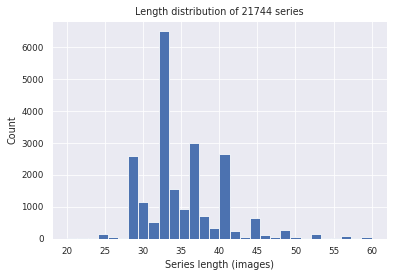

Found 8882 series with and 12862 without hemorrhage.


Text(0.5, 1.0, 'Length distribution of healthy and sick series')

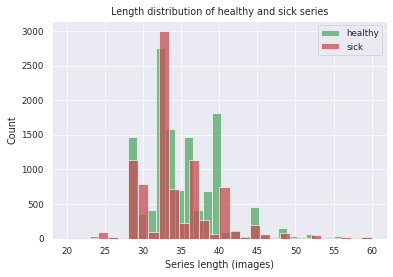

In [11]:
series_l = np.fromiter((len(series["series"]) for _, series in sorted_series.items()), dtype=int)
plt.hist(series_l, bins=30)
plt.xlabel("Series length (images)")
plt.ylabel("Count")
plt.title(f"Length distribution of {len(sorted_series)} series")
plt.show()

series_labels = np.fromiter((int(series["target"]) for _, series in sorted_series.items()), dtype=bool)
print(f"Found {sum(series_labels)} series with and {len(series_labels) - sum(series_labels)} without hemorrhage.")
plt.hist(series_l[series_labels == 0], bins=30, color="g", label="healthy", alpha=.75)
plt.hist(series_l[series_labels == 1], bins=30, color="r", label="sick", alpha=.75)
plt.legend()
plt.xlabel("Series length (images)")
plt.ylabel("Count")
plt.title(f"Length distribution of healthy and sick series")

In [15]:
# series, target, labels = train_dataset[np.random.choice(range(0, len(train_dataset)))]
series = sorted_series[series_ids[0]]
series_images = np.array(series["series"])
print(series_images)
series_target = int(series["target"])
print(f"Series target: {series_target}")

sns.set_style("whitegrid", {'axes.grid' : False})

for i, (image, label) in enumerate(series_data):
    img_path = os.path.join(train_dir, f"ID_{image}.npy")
    img = np.load(img_path)
    plt.imshow(img, cmap="gray")
    plt.title(f"Slice: {i} | Label: {label}")
    plt.show()
    plt.close()

[['76d55d9d0' '0']
 ['96d282ea9' '0']
 ['7d8a7c29d' '0']
 ['4d4401491' '0']
 ['8f5ded0b7' '0']
 ['213346b48' '0']
 ['e07862283' '0']
 ['c29529650' '0']
 ['1bc422f0c' '0']
 ['73bf91129' '0']
 ['55a7874f6' '0']
 ['2c2a37426' '0']
 ['e0276df9e' '0']
 ['1a5bac972' '0']
 ['d2e7247f5' '0']
 ['79273c19d' '0']
 ['2d0e5725a' '0']
 ['67591eae2' '0']
 ['fee5c2786' '0']
 ['12bf83ff1' '0']
 ['bbdc941dd' '0']
 ['483e6a157' '0']
 ['424b93897' '0']
 ['d292f6cab' '0']
 ['53553ad15' '0']
 ['4549ac4c6' '0']
 ['14faeae26' '0']
 ['1d97ba8b4' '0']
 ['ff1235609' '0']
 ['3818edf6c' '0']
 ['cd15da2e3' '0']
 ['da9a9b844' '0']
 ['6b55e3e00' '0']
 ['371de8f49' '0']
 ['bb7aea41b' '0']
 ['8db919b5c' '0']
 ['f870dcfd0' '0']
 ['d8a328562' '0']
 ['9a319f990' '0']
 ['36a144b7a' '0']]
Series target: 0


FileNotFoundError: [Errno 2] No such file or directory: '/export/gaon1/data/jteneggi/data/rsna-intracranial-hemorrhage-detection/stage_2_train/76d55d9d0.npy'